In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [2]:
df = pd.read_csv('kaggle_data/new-york-city-taxi-fare-prediction/train.csv', nrows=550000)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                550000 non-null  object 
 1   fare_amount        550000 non-null  float64
 2   pickup_datetime    550000 non-null  object 
 3   pickup_longitude   550000 non-null  float64
 4   pickup_latitude    550000 non-null  float64
 5   dropoff_longitude  549994 non-null  float64
 6   dropoff_latitude   549994 non-null  float64
 7   passenger_count    550000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 33.6+ MB


In [4]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,550000.000000,550000.000000,550000.000000,549994.000000,549994.000000,550000.000000
mean,11.348953,-72.527701,39.922421,-72.524337,39.917940,1.683707
std,9.883326,12.545991,7.950921,11.692485,7.297479,1.307607
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-2559.748913,0.000000
25%,6.000000,-73.992043,40.734942,-73.991390,40.734060,1.000000
50%,8.500000,-73.981790,40.752681,-73.980141,40.753135,1.000000
75%,12.500000,-73.967108,40.767092,-73.963602,40.768124,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [5]:
df = df.dropna()
df.shape

(549994, 8)

In [6]:
df = df[df['fare_amount'] > 0]
df.shape

(549954, 8)

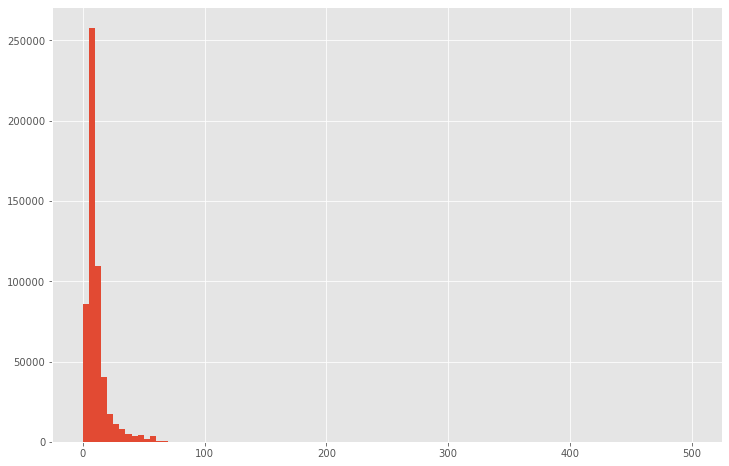

In [7]:
plt.figure(figsize=(12, 8))
plt.hist(x=df['fare_amount'], bins=100)
plt.show()

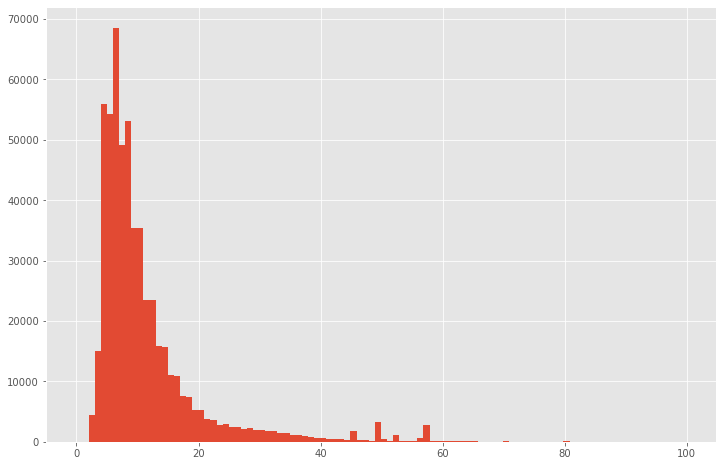

In [8]:
df = df[df['fare_amount'] < 100]
plt.figure(figsize=(12, 8))
plt.hist(x=df['fare_amount'], bins=100)
plt.show()

In [9]:
def outlier_iqr(df, columns=None):
    if columns == None:
        columns = df.columns

    for col in columns:
        q1 = df[col].describe()['25%']
        q3 = df[col].describe()['75%']
        #四分位範囲
        iqr = q3 - q1 
        
        outlier_min = q1 - iqr * 1.5
        outlier_max = q3 + iqr * 1.5

        # 範囲から外れている値を除く
        df = df[(df[col] >= outlier_min) & (df[col] <= outlier_max)]
        
    return df

In [10]:
print('before', df.shape)
df = outlier_iqr(df, columns=['fare_amount'])
print('after', df.shape)

before (549707, 8)
after (502410, 8)


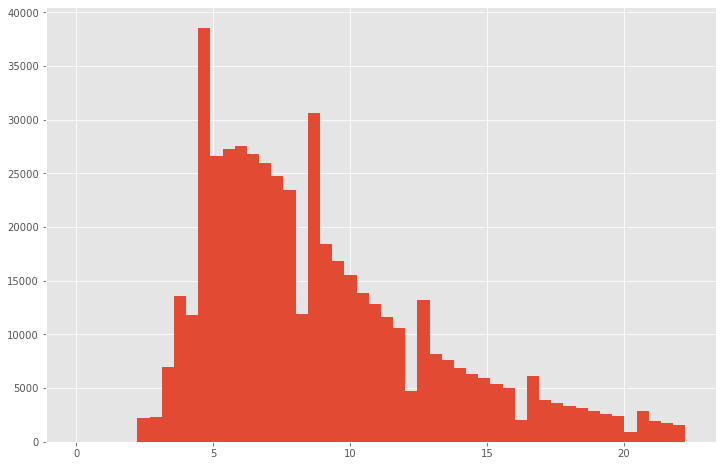

In [11]:
plt.figure(figsize=(12, 8))
plt.hist(x=df['fare_amount'], bins=50)
plt.show()

In [12]:
print('before', df.shape)
df = df[(df['pickup_longitude'] > -75) & (df['pickup_longitude'] < -73)]
df = df[(df['pickup_latitude'] > 40) & (df['pickup_latitude'] < 42)]
df = df[(df['dropoff_longitude'] > -75) & (df['dropoff_longitude'] < -73)]
df = df[(df['dropoff_latitude'] > 40) & (df['dropoff_latitude'] < 42)]
print('after', df.shape)

before (502410, 8)
after (492133, 8)


In [13]:
df['passenger_count'].value_counts()

1    341337
2     72056
5     34752
3     21456
4     10411
6     10253
0      1868
Name: passenger_count, dtype: int64

In [14]:
df = df[df['passenger_count'] > 0]
print('after', df.shape)

after (490265, 8)


In [15]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,490265.000000,490265.000000,490265.000000,490265.000000,490265.000000,490265.000000
mean,8.933894,-73.979709,40.752227,-73.978072,40.752539,1.686310
std,4.139031,0.028164,0.027131,0.028387,0.028941,1.303497
min,0.010000,-74.968142,40.052722,-74.964263,40.041180,1.000000
25%,5.700000,-73.992532,40.737282,-73.991863,40.737189,1.000000
50%,8.000000,-73.982429,40.753330,-73.981329,40.753990,1.000000
75%,11.000000,-73.970177,40.766867,-73.967958,40.767942,2.000000
max,22.250000,-73.036247,41.800252,-73.029770,41.923820,6.000000


In [16]:
def calculation_distance(x1, y1, x2, y2):
    R = 6371
    
    _x1, _y1, _x2, _y2  = map(np.radians, [x1, y1, x2, y2])
    
    delta_x = _x2 - _x1
    delta_y = _y2 - _y1
    
    a = np.sin(delta_y/2.0) ** 2 + np.cos(_y1) * np.cos(_y2) * np.sin(delta_x/2.0) ** 2
    return 2 * R * np.arcsin(np.sqrt(a))

def calculation_azimuth(x1, y1, x2, y2):
    _x1, _y1, _x2, _y2 = map(np.radians, [x1, y1, x2, y2])
    
    delta_x = _x2 - _x1
    _y = np.sin(delta_x)
    _x = np.cos(_y1) * np.tan(_y2) - np.sin(_y1) * np.cos(delta_x)

    psi = np.rad2deg(np.arctan2(_y, _x))
    
    return np.where(psi < 0, 360 + psi, psi)

In [17]:
df['distance'] = calculation_distance(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude']
)
df['azimuth'] = calculation_azimuth(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude']
)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,azimuth
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,167.240469
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,21.498365
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,211.033211
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,352.327836
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,28.802783


In [18]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['year'] = df['pickup_datetime'].dt.year

df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,azimuth,hour,day,month,dayofweek,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,167.240469,17,15,6,0,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,21.498365,16,5,1,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,211.033211,0,18,8,3,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,352.327836,4,21,4,5,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,28.802783,7,9,3,1,2010


In [19]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [20]:
X = df.drop(columns=['key', 'fare_amount', 'pickup_datetime'])
y = df['fare_amount']

X.shape, y.shape

((490265, 12), (490265,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((392212, 12), (98053, 12))

In [29]:
params = {
    'verbosity': 1,
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.1,
    'tree_method': 'exact',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'predictor': 'cpu_predictor'
}

# params = {
#     'silent': 1,
#     'max_depth': 6,
#     'min_child_weight': 1,
#     'eta': 0.1,
#     'tree_method': 'exact',
#     'objective': 'reg:linear',
#     'eval_metric': 'rmse',
#     'predictor': 'gpu_predictor'
# }

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=5,
    evals=[(dtest, 'test')]
)

[0]	test-rmse:8.51795
[1]	test-rmse:7.72210
[2]	test-rmse:7.01123
[3]	test-rmse:6.37683
[4]	test-rmse:5.81232
[5]	test-rmse:5.31045
[6]	test-rmse:4.86547
[7]	test-rmse:4.47159
[8]	test-rmse:4.12458
[9]	test-rmse:3.81991
[10]	test-rmse:3.55369
[11]	test-rmse:3.32098
[12]	test-rmse:3.11906
[13]	test-rmse:2.94446
[14]	test-rmse:2.79358
[15]	test-rmse:2.66306
[16]	test-rmse:2.55129
[17]	test-rmse:2.45541
[18]	test-rmse:2.37471
[19]	test-rmse:2.30634
[20]	test-rmse:2.24840
[21]	test-rmse:2.19859
[22]	test-rmse:2.15753
[23]	test-rmse:2.12034
[24]	test-rmse:2.09024
[25]	test-rmse:2.06517
[26]	test-rmse:2.04269
[27]	test-rmse:2.02316
[28]	test-rmse:2.00779
[29]	test-rmse:1.99381
[30]	test-rmse:1.98078
[31]	test-rmse:1.97082
[32]	test-rmse:1.96185
[33]	test-rmse:1.95403
[34]	test-rmse:1.94611
[35]	test-rmse:1.93937
[36]	test-rmse:1.93260
[37]	test-rmse:1.92758
[38]	test-rmse:1.92247
[39]	test-rmse:1.91830
[40]	test-rmse:1.91455
[41]	test-rmse:1.91072
[42]	test-rmse:1.90693
[43]	test-rmse:1.9037

[346]	test-rmse:1.77329
[347]	test-rmse:1.77318
[348]	test-rmse:1.77310
[349]	test-rmse:1.77301
[350]	test-rmse:1.77283
[351]	test-rmse:1.77282
[352]	test-rmse:1.77235
[353]	test-rmse:1.77196
[354]	test-rmse:1.77190
[355]	test-rmse:1.77190
[356]	test-rmse:1.77183
[357]	test-rmse:1.77134
[358]	test-rmse:1.77128
[359]	test-rmse:1.77129
[360]	test-rmse:1.77100
[361]	test-rmse:1.77045
[362]	test-rmse:1.77008
[363]	test-rmse:1.77009
[364]	test-rmse:1.77012
[365]	test-rmse:1.77010
[366]	test-rmse:1.77001
[367]	test-rmse:1.76993
[368]	test-rmse:1.76967
[369]	test-rmse:1.76971
[370]	test-rmse:1.76977
[371]	test-rmse:1.76980
[372]	test-rmse:1.76973
[373]	test-rmse:1.76976


In [30]:
gridsearch_params = [
    (max_depth, eta)
    for max_depth in [6, 7, 8]
    for eta in [0.1, 0.05, 0.01]
]
gridsearch_params

[(6, 0.1),
 (6, 0.05),
 (6, 0.01),
 (7, 0.1),
 (7, 0.05),
 (7, 0.01),
 (8, 0.1),
 (8, 0.05),
 (8, 0.01)]

In [ ]:
min_rmse = float('Inf')
best_param = []
for max_depth, eta in gridsearch_params:
    print(f'max_depth={max_depth}, eta={eta}')
    params['max_depth'] = max_depth
    params['eta'] = eta
    
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=20,
        seed=0,
        nfold=5,
        metrics=['rmse'],
        early_stopping_rounds=5
    )
    
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print(f'RMSE {mean_rmse} for {boost_rounds} rounds')
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_param = (max_depth, eta)

print(f'Best params {best_param}, RMSE {min_rmse}')

In [36]:
params['max_depth'] = 8
params['eta'] = 0.01

model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=5,
    evals=[(dtest, 'test')]
)

[0]	test-rmse:9.31849
[1]	test-rmse:9.22993
[2]	test-rmse:9.14230
[3]	test-rmse:9.05558
[4]	test-rmse:8.96978
[5]	test-rmse:8.88489
[6]	test-rmse:8.80090
[7]	test-rmse:8.71776
[8]	test-rmse:8.63549
[9]	test-rmse:8.55413
[10]	test-rmse:8.47358
[11]	test-rmse:8.39389
[12]	test-rmse:8.31508
[13]	test-rmse:8.23707
[14]	test-rmse:8.15988
[15]	test-rmse:8.08352
[16]	test-rmse:8.00795
[17]	test-rmse:7.93320
[18]	test-rmse:7.85924
[19]	test-rmse:7.78604
[20]	test-rmse:7.71363
[21]	test-rmse:7.64198
[22]	test-rmse:7.57114
[23]	test-rmse:7.50102
[24]	test-rmse:7.43165
[25]	test-rmse:7.36303
[26]	test-rmse:7.29514
[27]	test-rmse:7.22795
[28]	test-rmse:7.16149
[29]	test-rmse:7.09575
[30]	test-rmse:7.03074
[31]	test-rmse:6.96640
[32]	test-rmse:6.90279
[33]	test-rmse:6.83988
[34]	test-rmse:6.77761
[35]	test-rmse:6.71603
[36]	test-rmse:6.65509
[37]	test-rmse:6.59482
[38]	test-rmse:6.53523
[39]	test-rmse:6.47626
[40]	test-rmse:6.41792
[41]	test-rmse:6.36028
[42]	test-rmse:6.30322
[43]	test-rmse:6.2467

[346]	test-rmse:1.89049
[347]	test-rmse:1.88974
[348]	test-rmse:1.88890
[349]	test-rmse:1.88819
[350]	test-rmse:1.88752
[351]	test-rmse:1.88687
[352]	test-rmse:1.88620
[353]	test-rmse:1.88560
[354]	test-rmse:1.88475
[355]	test-rmse:1.88411
[356]	test-rmse:1.88347
[357]	test-rmse:1.88267
[358]	test-rmse:1.88210
[359]	test-rmse:1.88151
[360]	test-rmse:1.88088
[361]	test-rmse:1.88022
[362]	test-rmse:1.87962
[363]	test-rmse:1.87908
[364]	test-rmse:1.87834
[365]	test-rmse:1.87769
[366]	test-rmse:1.87694
[367]	test-rmse:1.87634
[368]	test-rmse:1.87580
[369]	test-rmse:1.87518
[370]	test-rmse:1.87456
[371]	test-rmse:1.87405
[372]	test-rmse:1.87358
[373]	test-rmse:1.87299
[374]	test-rmse:1.87234
[375]	test-rmse:1.87183
[376]	test-rmse:1.87116
[377]	test-rmse:1.87062
[378]	test-rmse:1.87016
[379]	test-rmse:1.86973
[380]	test-rmse:1.86925
[381]	test-rmse:1.86879
[382]	test-rmse:1.86816
[383]	test-rmse:1.86773
[384]	test-rmse:1.86735
[385]	test-rmse:1.86689
[386]	test-rmse:1.86644
[387]	test-rmse:

[688]	test-rmse:1.80359
[689]	test-rmse:1.80350
[690]	test-rmse:1.80339
[691]	test-rmse:1.80335
[692]	test-rmse:1.80325
[693]	test-rmse:1.80308
[694]	test-rmse:1.80300
[695]	test-rmse:1.80291
[696]	test-rmse:1.80274
[697]	test-rmse:1.80268
[698]	test-rmse:1.80258
[699]	test-rmse:1.80246
[700]	test-rmse:1.80240
[701]	test-rmse:1.80227
[702]	test-rmse:1.80224
[703]	test-rmse:1.80214
[704]	test-rmse:1.80206
[705]	test-rmse:1.80199
[706]	test-rmse:1.80186
[707]	test-rmse:1.80175
[708]	test-rmse:1.80172
[709]	test-rmse:1.80159
[710]	test-rmse:1.80150
[711]	test-rmse:1.80140
[712]	test-rmse:1.80132
[713]	test-rmse:1.80129
[714]	test-rmse:1.80120
[715]	test-rmse:1.80112
[716]	test-rmse:1.80101
[717]	test-rmse:1.80093
[718]	test-rmse:1.80088
[719]	test-rmse:1.80079
[720]	test-rmse:1.80073
[721]	test-rmse:1.80060
[722]	test-rmse:1.80056
[723]	test-rmse:1.80051
[724]	test-rmse:1.80041
[725]	test-rmse:1.80029
[726]	test-rmse:1.80027
[727]	test-rmse:1.80022
[728]	test-rmse:1.80017
[729]	test-rmse:

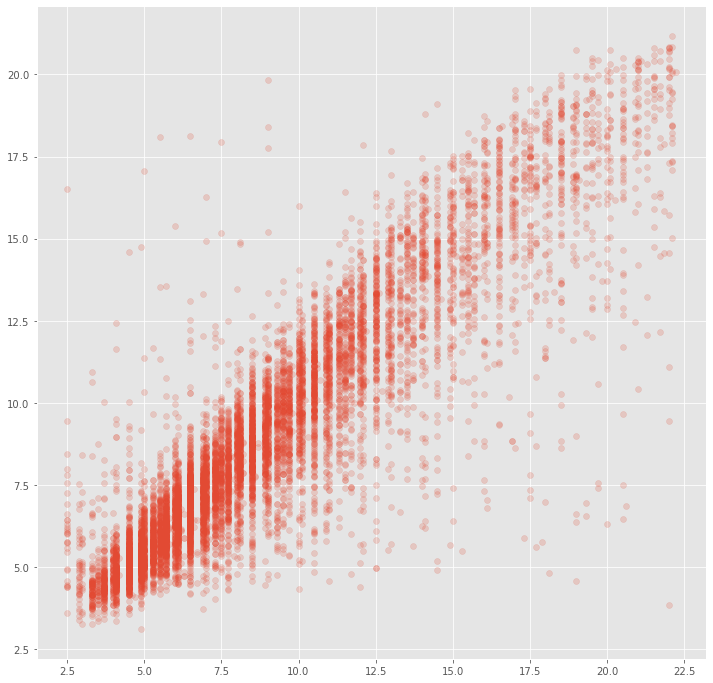

In [38]:
prediction = model.predict(
    xgb.DMatrix(X_test),
    ntree_limit=model.best_ntree_limit
)
plt.figure(figsize=(12, 12))
plt.scatter(y_test[:10000], prediction[:10000], alpha=0.2)
plt.show()

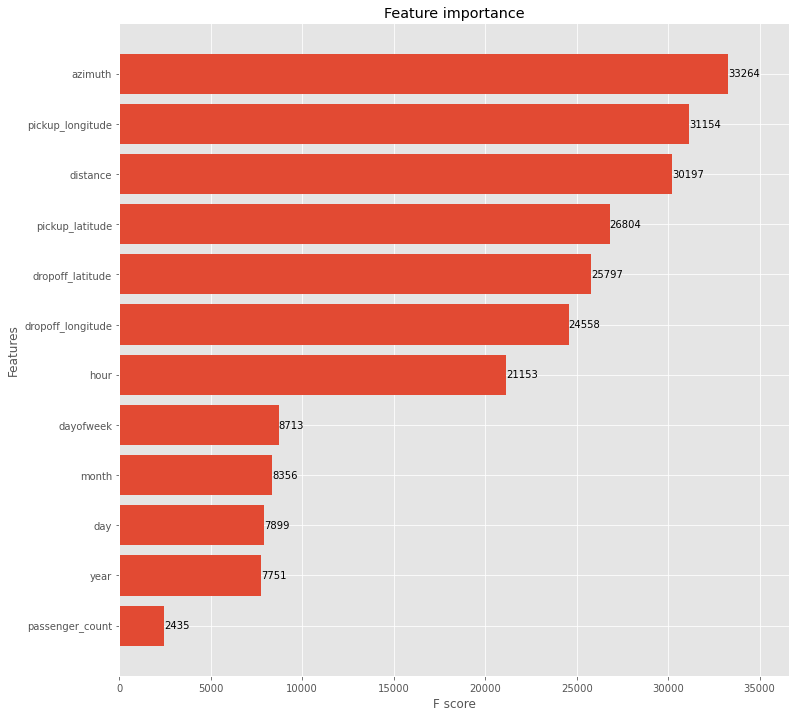

In [39]:
fig, ax = plt.subplots(figsize=(12, 12))
xgb.plot_importance(
    model,
    max_num_features=12,
    height=0.8,
    ax=ax
)
plt.show()